Laureta es una Profesora de Ballet Licenciada en Arte Danzario que regresa a Cuba después de 10 años trabajando en el exterior, después de 6 meses ya se está adaptando a sú país natal de nuevo, pero varias cosas han cambiado, pero una de sus mayores inquietudes es el salario, y quiere saber si con su salario puede invitar a su hijo a un bar/restaurante para celebrar su cumpleaños 18.

## Salario
El salario de la Profesora de Ballet Licenciada en Arte Danzario, Laureta es de 4375 CUP:

In [1]:
import json
import pandas as pd

df = pd.DataFrame(columns=['Grupos', 'Jornada de 40 horas (Semanales) CUP', 'Jornada de 44 horas (Semanales) CUP'])

with open('salaries.json', 'r') as file:
    data = json.load(file)

    for i in range(0, len(data)):
        items = data[i]
        df.loc[i] = [data[i]['group'], data[i]['40_hours'],data[i]['44_hours']]

df

,Grupos,Jornada de 40 horas (Semanales) CUP,Jornada de 44 horas (Semanales) CUP
0,01,1910,2100
1,02,2000,2200
2,03,2090,2300
3,04,2200,2420
4,05,2310,2540
5,06,2415,2660
6,07,2555,2810
7,08,2690,2960
8,09,2825,3110
9,10,2965,3260


Como podemos ver el salario de Laureta pertenece al grupo 17, de 40 horas de jornada semanal

## Cantidad de Establecimientos
Laureta quiere saber cuántos bares y restaurantes hay en la Capital Habanera.

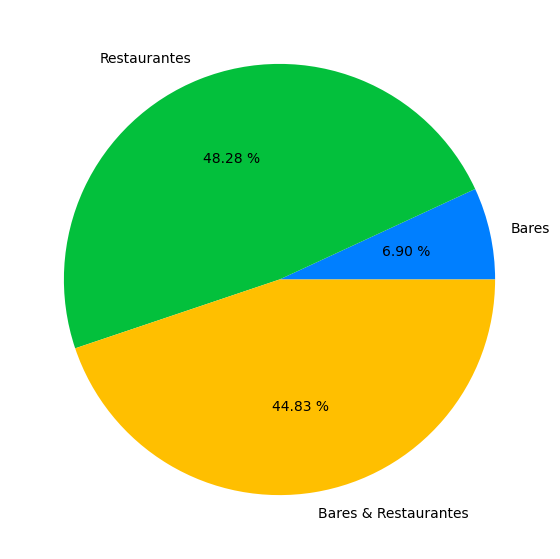

In [17]:
import json
import os
import matplotlib.pyplot as plt

path_folder = 'bars_restaurants/'

list_json = []

list_bar = []
list_restaurant = []
list_bar_restaurant = []

for file in os.listdir(path_folder):
    if file.endswith('.json'):
        path_file = os.path.join(path_folder, file)
        with open(path_file, 'r') as file:
            data = json.load(file)
            list_json.append(data)

        if "establishment" in data:
            establishment = data['establishment']
            if establishment == ['bar']:
                list_bar.append(establishment)
            elif establishment == ['restaurante']:
                list_restaurant.append(establishment)
            elif establishment == ['bar', 'restaurante']:
                list_bar_restaurant.append(establishment)

percent_bar = (len(list_bar) * 100) / len(list_json)
percent_restaurant = (len(list_restaurant) * 100) / len(list_json)
percent_bar_restaurant = (len(list_bar_restaurant) * 100) / len(list_json)

plt.figure(figsize=(7, 7))
x = ['Bares', 'Restaurantes', 'Bares & Restaurantes']
y = [percent_bar, percent_restaurant, percent_bar_restaurant]

plt.pie(y, labels=x, autopct='%0.2f %%', colors=['#007FFF', '#03C03C', '#FFBF00'])
plt.show()

### Cantidad de Establecimientos por Municipio

#### Bares:

In [16]:
import json
import os
import matplotlib.pyplot as plt

path_folder = 'bars_restaurants/'

list_json = []

bar_arroyo_naranjo = []
bar_boyeros = []
bar_cerro = []
bar_centro_habana = []
bar_cotorro = []
bar_diez_de_octubre = []
bar_guanabacoa = []
bar_habana_del_este = []
bar_habana_vieja = []
bar_la_lisa = []
bar_marianao = []
bar_playa = []
bar_plaza_de_la_revolucion = []
bar_regla = []
bar_san_miguel_del_padron = []

for file in os.listdir(path_folder):
    if file.endswith('.json'):
        path_file = os.path.join(path_folder, file)
        with open(path_file, 'r') as file:
            data = json.load(file)
            list_json.append(data)

            if 'establishment' in data:
                establishment = data['establishment']
                if establishment == ['bar']:
                    if 'address' in data:
                        address = data['address']
                        if 'town' in address:
                            town = address['town']
                            if town == 'arroyo naranjo':
                                bar_arroyo_naranjo.append(town)

print(len(bar_arroyo_naranjo))

0


## Contacto
Laureta y su hijo, quieren saber si existe alguna manera de contactar con los establecimiento, pero como hace poco fue que retornó al país, no sabe a donde llevarlo o no sabe por donde buscar. Su hijo le dice que hoy en día se puede buscar por internet y averiguar como contactar a un establecimiento para averiguar sus reseñas, maneras de contactarlos, acceder al menú y ver que ofertas ofrecen.

Las vías más comunes son:
- Facebook
- Instagram
- WhatsApp
- Página Web

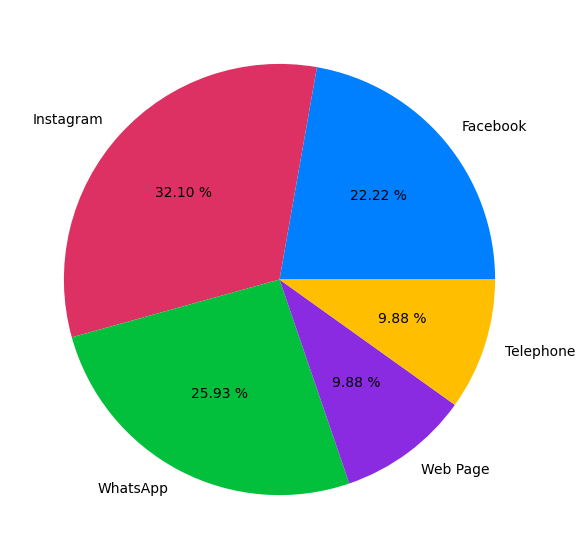

In [29]:
import json
import os
import matplotlib.pyplot as plt

path_folder = 'bars_restaurants/'

list_json = []

list_facebook = []
list_instagram = []
list_whatsapp = []
list_web = []
list_telephone = []

for file in os.listdir(path_folder):
    if file.endswith('.json'):
        path_file = os.path.join(path_folder, file)
        with open(path_file, 'r') as file:
            data = json.load(file)
            list_json.append(data)

        if "contact" in data:
            contact = data['contact']
            if 'facebook' in contact:
                facebook = contact['facebook']
                if facebook is not None:
                    list_facebook.append(facebook)
            if 'instagram' in contact:
                instagram = contact['instagram']
                if instagram is not None:
                    list_instagram.append(instagram)
            if 'whatsapp' in contact:
                whatsapp = contact['whatsapp']
                if whatsapp is not None:
                    list_whatsapp.append(whatsapp)
            if 'web' in contact:
                web = contact['web']
                if web is not None:
                    list_web.append(web)
            if 'telephone' in contact:
                telephone = contact['telephone']
                if telephone is not None:
                    list_telephone.append(telephone)

percent_facebook = (len(list_facebook) * 100) / len(list_json)
percent_instagram = (len(list_instagram) * 100) / len(list_json)
percent_whatsapp = (len(list_whatsapp) * 100) / len(list_json)
percent_web = (len(list_web) * 100) / len(list_json)
percent_telephone = (len(list_web) * 100) / len(list_json)

plt.figure(figsize=(7, 7))
x = ['Facebook', 'Instagram', 'WhatsApp', 'Web Page', 'Telephone']
y = [percent_facebook, percent_instagram, percent_whatsapp, percent_web, percent_telephone]

plt.pie(y, labels=x , autopct='%0.2f %%', colors=['#007FFF', '#DE3163', '#03C03C', '#8A2BE2', '#FFBF00'])
plt.show()

## Métodos de Pagos
Ahora Laureta quiere saber que otros métodos de pagos existen, porque últimamente hay problemas con los cajeros automáticos que no tienen los suficientes billetes para que uno pueda extraer, y si va a caja solo están dando billetes chicos de 20 y 50 CUP.

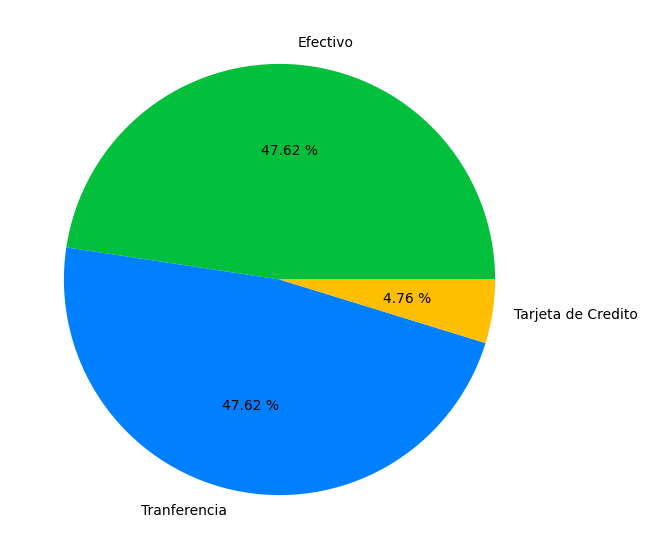

In [24]:
import json
import os
import matplotlib.pyplot as plt

path_folder = 'bars_restaurants/'

list_json = []

list_cash = []
list_transfer = []
list_credit_card = []

for file in os.listdir(path_folder):
    if file.endswith('.json'):
        path_file = os.path.join(path_folder, file)
        with open(path_file, 'r') as file:
            data = json.load(file)
            list_json.append(data)

        if "payment" in data:
            payment = data['payment']
            if 'cash' in payment:
                cash = payment['cash']
                if cash is not False:
                    list_cash.append(cash)
            if 'transfer' in payment:
                transfer = payment['transfer']
                if transfer is not False:
                    list_transfer.append(transfer)
            if 'credit_card' in payment:
                credit_card = payment['credit_card']
                if credit_card is not False:
                    list_credit_card.append(credit_card)

percent_cash = (len(list_cash) * 100) / len(list_json)
percent_transfer = (len(list_transfer) * 100) / len(list_json)
percent_credit_card = (len(list_credit_card) * 100) / len(list_json)

plt.figure(figsize=(7, 7))
x = ['Efectivo', 'Tranferencia', 'Tarjeta de Credito']
y = [percent_cash, percent_transfer, percent_credit_card]

plt.pie(y, labels=x, autopct='%0.2f %%', colors=['#03C03C', '#007FFF', '#FFBF00'])
plt.show()

## Servicios que Ofrecen
Algunos restaurantes están demasiado lejos de su municipio o es complicado llegar al establecimiento por los problemas actuales que tiene el transporte público. También saber si se puede pedir que se prepare la comida y solo ir a buscarla porque a veces están cogestionados de personas. O quieren saber si se puede reservar para el día del cumpleaños de su hijo.

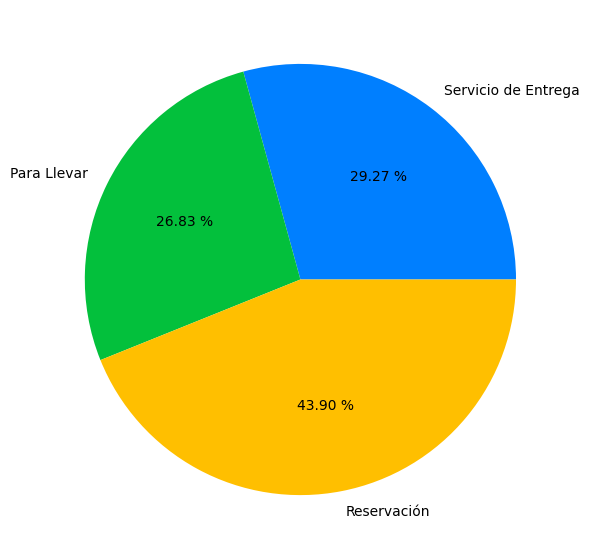

In [1]:
import json
import os
import matplotlib.pyplot as plt

path_folder = 'bars_restaurants/'

list_json = []

list_delivery = []
list_to_take = []
list_reserve = []

for file in os.listdir(path_folder):
    if file.endswith('.json'):
        path_file = os.path.join(path_folder, file)
        with open(path_file, 'r') as file:
            data = json.load(file)
            list_json.append(data)

        if "establishment" in data:
            establishment = data['establishment']
            if establishment == ['restaurante']:
                if 'services' in data:
                    services = data['services']
                    if 'delivery' in services:
                        delivery = services['delivery']
                        if delivery is not False:
                            list_delivery.append(delivery)
                    if 'to_take' in services:
                        to_take = services['to_take']
                        if to_take is not False:
                            list_to_take.append(to_take)
                    if 'reserve' in services:
                        reserve = services['reserve']
                        if reserve is not False:
                            list_reserve.append(reserve)

            elif establishment == ['bar', 'restaurante']:
                if 'services' in data:
                    services = data['services']
                    if 'delivery' in services:
                        delivery = services['delivery']
                        if delivery is not False:
                            list_delivery.append(delivery)
                    if 'to_take' in services:
                        to_take = services['to_take']
                        if to_take is not False:
                            list_to_take.append(to_take)
                    if 'reserve' in services:
                        reserve = services['reserve']
                        if reserve is not False:
                            list_reserve.append(reserve)

percent_delivery = (len(list_delivery) * 100) / len(list_json)
percent_to_take = (len(list_to_take) * 100) / len(list_json)
percent_reserve = (len(list_reserve) * 100) / len(list_json)

plt.figure(figsize=(7, 7))
x = ['Servicio de Entrega', 'Para Llevar', 'Reservación']
y = [percent_delivery, percent_to_take, percent_reserve]

plt.pie(y, labels=x, autopct='%0.2f %%', colors=['#007FFF', '#03C03C', '#FFBF00'])
plt.show()